In [1]:
import os

In [2]:
# data_path = os.path.abspath(os.path.join("artifacts", "data"))
data_path = os.path.join("..", "artifacts", "images")
data_path

'../artifacts/images'

In [3]:
img = ("dress", "3f844e1e-4a00-4b64-8c1d-3b847191bf11.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image_path

'/Users/jeroen/Documents/Personal_Projects/green-fashion/artifacts/images/dress/3f844e1e-4a00-4b64-8c1d-3b847191bf11.jpg'

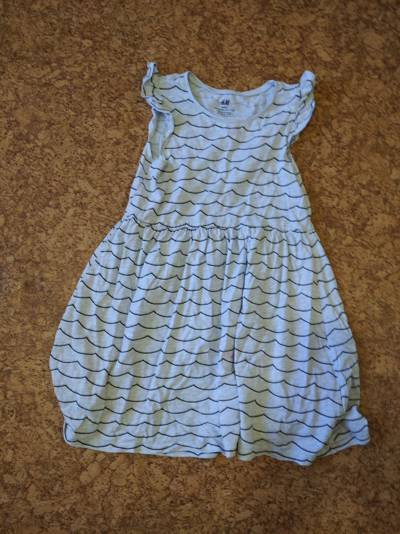

In [4]:
from PIL import Image
image = Image.open(image_path)
image 

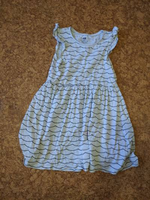

array([[92, 66, 41],
       [77, 51, 26],
       [84, 58, 33],
       ...,
       [81, 54, 32],
       [78, 52, 29],
       [84, 58, 33]], shape=(30000, 3), dtype=uint8)

In [7]:
from PIL import Image
image = Image.open(image_path)
resize_width=150

original_width, original_height = image.size
aspect_ratio = original_height / original_width
resize_height = int(resize_width * aspect_ratio)
image = image.resize((resize_width, resize_height), Image.Resampling.LANCZOS)
display(image)
import numpy as np
pixels = np.array(image).reshape(-1, 3)
pixels

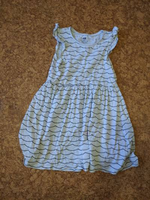

[(array([90, 61, 34]), 30.8),
 (array([131, 147, 163]), 28.79),
 (array([152, 174, 207]), 15.93),
 (array([105, 116, 123]), 14.713333333333335),
 (array([114,  84,  54]), 9.766666666666666)]

In [8]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

def extract_color_palette(_image_path, n_colors=5, resize_width=150):
    image = Image.open(_image_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    original_width, original_height = image.size
    aspect_ratio = original_height / original_width
    resize_height = int(resize_width * aspect_ratio)
    image = image.resize((resize_width, resize_height), Image.Resampling.LANCZOS)
    display(image)
    
    pixels = np.array(image).reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    
    color_counts = Counter(labels)
    color_percentages = [(count / len(labels)) * 100 for count in color_counts.values()]
    
    palette = list(zip(colors, color_percentages))
    palette.sort(key=lambda x: x[1], reverse=True)
    
    return palette

palette = extract_color_palette(image_path, n_colors=5, resize_width=150)
palette

Color 1: RGB(np.int64(90), np.int64(61), np.int64(34)) - 30.8%
Color 2: RGB(np.int64(131), np.int64(147), np.int64(163)) - 28.8%
Color 3: RGB(np.int64(152), np.int64(174), np.int64(207)) - 15.9%
Color 4: RGB(np.int64(105), np.int64(116), np.int64(123)) - 14.7%
Color 5: RGB(np.int64(114), np.int64(84), np.int64(54)) - 9.8%


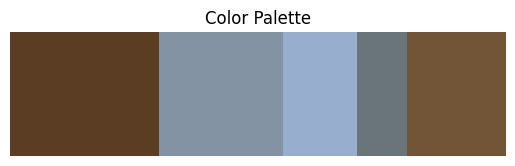

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def display_palette(palette, save_path=None):
    fig, ax1  = plt.subplots(1, 1) 
    
    palette_height = 5
    palette_width = 20
    palette_img = np.zeros((palette_height, palette_width, 3), dtype=np.uint8)
    
    x_start = 0
    for i, (color, percentage) in enumerate(palette):
        if i == len(palette) - 1:
            section_width = palette_width - x_start
        else:
            section_width = int(palette_width * percentage / 100)
        
        palette_img[:, x_start:x_start + section_width] = color
        x_start += section_width
    
    ax1.imshow(palette_img)
    ax1.set_title('Color Palette')
    ax1.axis('off')
    
    for i, (color, percentage) in enumerate(palette):
        print(f"Color {i+1}: RGB{tuple(color)} - {percentage:.1f}%")
    
    plt.show()

display_palette(palette)

In [10]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

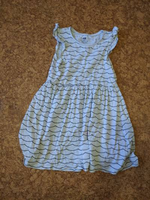

[{'rank': 1,
  'rgb': (np.int64(101), np.int64(73), np.int64(44)),
  'hex': '#65492c',
  'percentage': 60.1},
 {'rank': 2,
  'rgb': (np.int64(116), np.int64(129), np.int64(140)),
  'hex': '#74818c',
  'percentage': 21.2},
 {'rank': 3,
  'rgb': (np.int64(147), np.int64(168), np.int64(197)),
  'hex': '#93a8c5',
  'percentage': 18.7}]

In [11]:
def get_color_palette_info(image_path, n_colors=5):
    palette = extract_color_palette(image_path, n_colors)
    
    result = []
    for i, (color, percentage) in enumerate(palette):
        color_info = {
            'rank': i + 1,
            'rgb': tuple(color),
            'hex': rgb_to_hex(color),
            'percentage': round(percentage, 1)
        }
        result.append(color_info)
    
    return result

color_palette_info = get_color_palette_info(image_path, n_colors=3)
color_palette_info

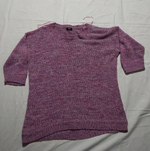

Color 1: RGB(np.int64(189), np.int64(188), np.int64(184)) - 55.1%
Color 2: RGB(np.int64(97), np.int64(65), np.int64(84)) - 23.6%
Color 3: RGB(np.int64(141), np.int64(140), np.int64(136)) - 21.2%


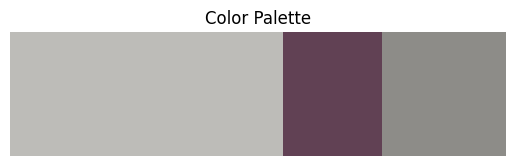

In [12]:
# image_path = "your_image.jpg"
img = ("longsleeve", "0df1efc7-34ba-4e11-b027-21ec8fa5a35e.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
n_colors_to_extract = 3

palette = extract_color_palette(image_path, n_colors=n_colors_to_extract)
display_palette(palette)

In [13]:
import os

def get_jpg_files(folder_path):
   return [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]

Found 26 JPG files in the folder.


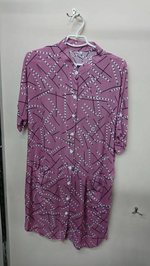

Color 1: RGB(np.int64(124), np.int64(90), np.int64(115)) - 29.9%
Color 2: RGB(np.int64(144), np.int64(140), np.int64(141)) - 26.7%
Color 3: RGB(np.int64(190), np.int64(190), np.int64(188)) - 24.7%
Color 4: RGB(np.int64(82), np.int64(51), np.int64(73)) - 18.7%


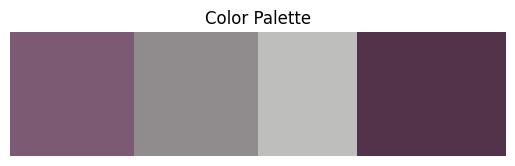

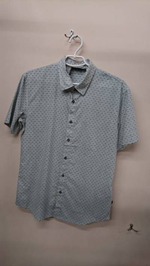

Color 1: RGB(np.int64(114), np.int64(109), np.int64(109)) - 33.8%
Color 2: RGB(np.int64(135), np.int64(132), np.int64(132)) - 28.5%
Color 3: RGB(np.int64(87), np.int64(85), np.int64(84)) - 22.6%
Color 4: RGB(np.int64(179), np.int64(165), np.int64(159)) - 15.1%


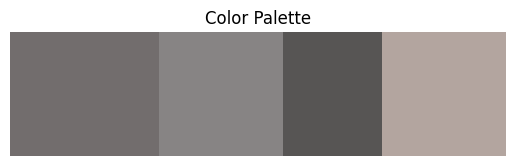

In [14]:
n_colors_to_extract = 4
max_images = 2

category = "shirt"

jpg_files = get_jpg_files(f'{data_path}/{category}')
print(f"Found {len(jpg_files)} JPG files in the folder.")

max_display = min(max_images, len(jpg_files))

for single_img in jpg_files[:max_display]:
    single_img_path = os.path.join(data_path, category, single_img)
    palette = extract_color_palette(single_img_path, n_colors=n_colors_to_extract)
    display_palette(palette)

Found 72 JPG files in the folder.


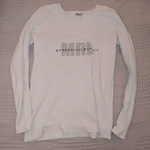

Color 1: RGB(np.int64(132), np.int64(115), np.int64(110)) - 32.3%
Color 2: RGB(np.int64(176), np.int64(163), np.int64(159)) - 26.1%
Color 3: RGB(np.int64(149), np.int64(132), np.int64(129)) - 21.7%
Color 4: RGB(np.int64(188), np.int64(175), np.int64(172)) - 19.8%


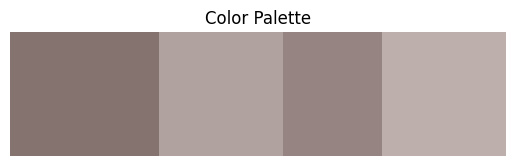

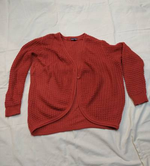

Color 1: RGB(np.int64(160), np.int64(151), np.int64(146)) - 43.7%
Color 2: RGB(np.int64(206), np.int64(202), np.int64(196)) - 26.8%
Color 3: RGB(np.int64(136), np.int64(41), np.int64(36)) - 23.8%
Color 4: RGB(np.int64(184), np.int64(180), np.int64(174)) - 5.7%


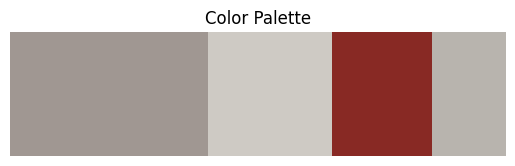

In [15]:
n_colors_to_extract = 4
max_images = 2

category = "longsleeve"

jpg_files = get_jpg_files(f'{data_path}/{category}')
print(f"Found {len(jpg_files)} JPG files in the folder.")

max_display = min(max_images, len(jpg_files))

for single_img in jpg_files[:max_display]:
    single_img_path = os.path.join(data_path, category, single_img)
    palette = extract_color_palette(single_img_path, n_colors=n_colors_to_extract)
    display_palette(palette)

Found 52 JPG files in the folder.


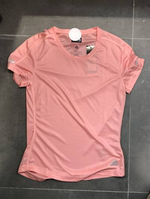

Color 1: RGB(np.int64(209), np.int64(135), np.int64(131)) - 32.7%
Color 2: RGB(np.int64(67), np.int64(64), np.int64(59)) - 29.4%
Color 3: RGB(np.int64(119), np.int64(112), np.int64(107)) - 19.1%
Color 4: RGB(np.int64(235), np.int64(160), np.int64(156)) - 18.8%


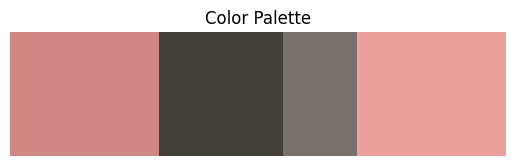

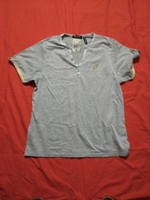

Color 1: RGB(np.int64(183), np.int64(59), np.int64(46)) - 32.0%
Color 2: RGB(np.int64(131), np.int64(130), np.int64(125)) - 27.9%
Color 3: RGB(np.int64(138), np.int64(37), np.int64(31)) - 25.0%
Color 4: RGB(np.int64(160), np.int64(161), np.int64(156)) - 15.1%


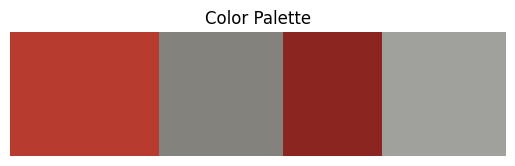

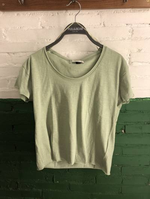

Color 1: RGB(np.int64(86), np.int64(87), np.int64(59)) - 29.7%
Color 2: RGB(np.int64(168), np.int64(161), np.int64(127)) - 25.5%
Color 3: RGB(np.int64(226), np.int64(210), np.int64(184)) - 24.1%
Color 4: RGB(np.int64(26), np.int64(35), np.int64(19)) - 20.7%


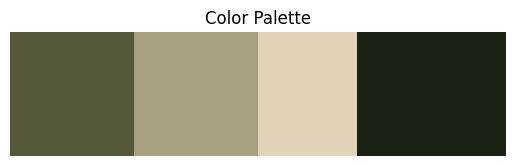

In [16]:
n_colors_to_extract = 4
max_images = 3

category = "t-shirt"

jpg_files = get_jpg_files(f'{data_path}/{category}')
print(f"Found {len(jpg_files)} JPG files in the folder.")

max_display = min(max_images, len(jpg_files))

for single_img in jpg_files[:max_display]:
    single_img_path = os.path.join(data_path, category, single_img)
    palette = extract_color_palette(single_img_path, n_colors=n_colors_to_extract)
    display_palette(palette)